<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-проблем-в-данных" data-toc-modified-id="Поиск-проблем-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск проблем в данных</a></span></li><li><span><a href="#Изменение-данных" data-toc-modified-id="Изменение-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение данных</a></span></li><li><span><a href="#Расчёт-данных-по-пользователям" data-toc-modified-id="Расчёт-данных-по-пользователям-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Расчёт данных по пользователям</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-поведения-клиентов" data-toc-modified-id="Исследование-поведения-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование поведения клиентов</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-тарифов-«Ультра»-и-«Смарт»" data-toc-modified-id="Сравнение-тарифов-«Ультра»-и-«Смарт»-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сравнение тарифов «Ультра» и «Смарт»</a></span></li><li><span><a href="#Cравнение-пользователей-из-Москвы-и-пользователей-из-других-регионов" data-toc-modified-id="Cравнение-пользователей-из-Москвы-и-пользователей-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cравнение пользователей из Москвы и пользователей из других регионов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Клиентам оператора сотовой связи предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Необходимо провести исследование данных пользователей и выявить, какой тариф лучше.

## Загрузка данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# настройка отображения всех столбцов
pd.set_option('display.max_columns', None)

Отключение вывода в прокручиваемом окне:

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Загрузка данных
try:
    df_calls = pd.read_csv('D:/DF_practicum/3/calls.csv')
    df_internet = pd.read_csv('D:/DF_practicum/3/internet.csv')
    df_messages = pd.read_csv('D:/DF_practicum/3/messages.csv')
    df_tariffs = pd.read_csv('D:/DF_practicum/3/tariffs.csv')
    df_users = pd.read_csv('D:/DF_practicum/3/users.csv')
except:
    df_calls = pd.read_csv('calls.csv')
    df_internet = pd.read_csv('internet.csv')
    df_messages = pd.read_csv('messages.csv')
    df_tariffs = pd.read_csv('tariffs.csv')
    df_users = pd.read_csv('users.csv')
    
df_df = [df_tariffs, df_users, df_calls, df_internet, df_messages]

for x in df_df:
    display(x.head(3))
    print(x.info())
    print()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None



,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



**Описание данных**

Таблица users (информация о пользователях):

- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

Таблица calls (информация о звонках):
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Описание тарифов**

| **Тариф «Смарт»** |  |
| :-------------------- | :-------------------- |
| Ежемесячная плата: | 550 рублей
| Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
| Стоимость услуг сверх тарифного пакета:
| минута разговора: | 3 рубля
| сообщение: | 3 рубля
| 1 Гб интернет-трафика: | 200 рублей

| **Тариф «Ультра»** |  |
| :-------------------- | :-------------------- |
| Ежемесячная плата: | 1950 рублей |
| Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика |
| Стоимость услуг сверх тарифного пакета: |
| минута разговора: | 1 рубля |
| сообщение: | 1 рубля |
| 1 Гб интернет-трафика: | 150 рублей |

## Предобработка данных

### Поиск проблем в данных

In [5]:
# Поиск пропусков и дубликатов
for z in df_df:
    print(z.isna().sum())
    print(z.duplicated().sum())
    print()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
0

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
0

id           0
call_date    0
duration     0
user_id      0
dtype: int64
0

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
0

id              0
message_date    0
user_id         0
dtype: int64
0



In [6]:
# Проверка данных на неправильные значения (отрицательные, зашкаливающие)
display(df_users.describe())
display(df_calls.describe())
display(df_internet.describe())
display(df_messages.describe())

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [7]:
# Проверка данных на год выгрузки 2018
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y.%m.%d')
print(pd.DatetimeIndex(df_users['reg_date']).year.value_counts())

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y.%m.%d')
print(pd.DatetimeIndex(df_calls['call_date']).year.value_counts())

df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y.%m.%d')
print(pd.DatetimeIndex(df_internet['session_date']).year.value_counts())

df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y.%m.%d')
print(pd.DatetimeIndex(df_messages['message_date']).year.value_counts())

2018    500
Name: reg_date, dtype: int64
2018    202607
Name: call_date, dtype: int64
2018    149396
Name: session_date, dtype: int64
2018    123036
Name: message_date, dtype: int64


### Изменение данных
Для того, что бы изучать и объединять данные по месяцам нужно столбец с датой превратить в столбец с месяцем.

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

In [8]:
# Получение из даты месяца
df_users['reg_date'] = pd.DatetimeIndex(df_users['reg_date']).month
df_calls['call_date'] = pd.DatetimeIndex(df_calls['call_date']).month
df_internet['session_date'] = pd.DatetimeIndex(df_internet['session_date']).month
df_messages['message_date'] = pd.DatetimeIndex(df_messages['message_date']).month

# Переименование столбца
df_calls.rename(columns = {'call_date':'month'}, inplace = True)
df_internet.rename(columns = {'session_date':'month'}, inplace = True)
df_messages.rename(columns = {'message_date':'month'}, inplace = True)

In [9]:
# Удаление лишнего столбца
df_internet = df_internet.drop(columns = ['Unnamed: 0'])

In [10]:
# Округление звонков до минут вверх
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
# Изменение типа данных на целочисленный
df_calls['duration'] = df_calls['duration'].astype('int')
# Замена заглавных букв на строчные
df_users['city'] = df_users['city'].str.lower()

### Расчёт данных по пользователям
Для дальнейшего исследования найду:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

In [11]:
# Подсчёт количества сделанных звонков и израсходованных минут по месяцам для каждого пользователя
user_calls = df_calls.groupby(['user_id', 'month'])\
                     .agg({'duration':'sum', 'id':'count'})\
                     .reset_index()\
                     .rename(columns = {'id':'calls_count'})

In [12]:
# Подсчёт количества отправленных сообщений по месяцам для каждого пользователя
user_messages = df_messages.groupby(['user_id', 'month'])\
                           .agg({'id':'count'})\
                           .reset_index()\
                           .rename(columns = {'id':'messages_count'})

In [13]:
# Подсчёт объема израсходованного интернет-трафика по месяцам;
user_internet = df_internet.groupby(['user_id', 'month'])\
                           .agg({'mb_used':'sum'})\
                           .reset_index()

In [14]:
# Перевод МБ в ГБ, округление в большую сторону и изменение типа на целочисленный
user_internet['mb_used'] = (user_internet['mb_used'] / 1024).apply(np.ceil).astype('int')
# Переименование столбца
user_internet = user_internet.rename(columns = {'mb_used':'gb_used'})

In [15]:
# Переименование столбца с тарифами для объединения с основной таблицей
df_tariffs = df_tariffs.rename(columns = {'tariff_name':'tariff'})

In [16]:
# Объединение таблиц
df = user_calls.merge(user_messages, on = ['user_id', 'month'], how = 'outer')
df = df.merge(user_internet, on = ['user_id', 'month'], how = 'outer')
df = df.merge(df_users, on = 'user_id', how = 'left')
df = df.merge(df_tariffs, on = 'tariff', how = 'left')

In [17]:
df.user_id.nunique()

498

In [18]:
# Перевод из МБ в ГБ и переименование столбца
df['mb_per_month_included'] = df['mb_per_month_included'] / 1024
df = df.rename(columns = {'mb_per_month_included':'gb_per_month_included'})

# Расчёт перерасхода минут, ГБ и сообщений
df['minutes_stay'] = df['duration'] - df['minutes_included']
df['messages_stay'] = df['messages_count'] - df['messages_included']
df['gb_stay'] = df['gb_used'] - df['gb_per_month_included']

# Замена отрицательных значений на нули
df.loc[df['minutes_stay'] < 0, 'minutes_stay'] = 0
df.loc[df['messages_stay'] < 0, 'messages_stay'] = 0
df.loc[df['gb_stay'] < 0, 'gb_stay'] = 0

# Замена пропусков на нули
df['minutes_stay'] = df['minutes_stay'].fillna(0)
df['messages_stay'] = df['messages_stay'].fillna(0)
df['gb_stay'] = df['gb_stay'].fillna(0)

# Расчёт переплаты за расход сверх тарифа
df['minutes_over_rub'] = df['minutes_stay'] * df['rub_per_minute']
df['messages_over_rub'] = df['messages_stay'] * df['rub_per_message']
df['gb_over_rub'] = df['gb_stay'] * df['rub_per_gb']

# Расчёт выручки с каждого пользователя в месяц
df['monthly_revenue'] = df['minutes_over_rub'] + df['messages_over_rub'] + df['gb_over_rub'] + df['rub_monthly_fee']

In [19]:
df['monthly_revenue'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: monthly_revenue, dtype: float64

### Выводы


**Поиск проблем в данных:**
- В несоединённых таблицах пропусков и дубликатов нет, за исключением df_users['churn_date'], но заменять их пока не буду. Также отсутствуют отрицательные и зашкаливающие значения. Проверил все датасеты на возможно выгруженные данные не за 2018 год, проблем не обнаружил.

**Изменение данных:**
- Преобразовал тип данных столбцов с датой на Datetime и вывел месяца. Обнаружил лишний столбец df_internet['Unnamed: 0'], значения, которого совпадают с индексами, и удалил его. Округлил звонки до минут вверх. Изменил заглавные буквы на строчные в столбце городов.


**Расчёт данных по пользователям:**
- Сгруппировал данные по 'user_id' и 'month' и объединил все таблицы в одну. В столбцах  'minutes_stay', 'messages_stay', 'gb_stay' образовались пропуски. Они появились, когда происходило слияние таблиц на местах где данные из "правой" таблицы отсутствовали. Поэтому заменю их нулями.  Нашёл перерасход по тарифу и посчитал, сколько в итоге заплатил клиент за месяц.

Данные готовы для дальнейшего исследования.

## Исследование поведения клиентов
Необходимо описать поведение клиентов оператора. Для этого найду, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц и посчитаю среднее количество, дисперсию и стандартное отклонение.

In [20]:
df.sample(5)

,user_id,month,duration,calls_count,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_stay,messages_stay,gb_stay,minutes_over_rub,messages_over_rub,gb_over_rub,monthly_revenue
2840,1448,11,526.0,69.0,34.0,21.0,42,NaN,кострома,Ростислав,Дроздов,9,smart,50,15.0,500,550,200,3,3,26.0,0.0,6.0,78.0,0.0,1200.0,1828.0
855,1138,7,483.0,65.0,7.0,16.0,23,NaN,екатеринбург,Леся,Ерофеева,7,smart,50,15.0,500,550,200,3,3,0.0,0.0,1.0,0.0,0.0,200.0,750.0
745,1119,9,280.0,39.0,43.0,20.0,53,NaN,петрозаводск,Олег,Сухарев,4,smart,50,15.0,500,550,200,3,3,0.0,0.0,5.0,0.0,0.0,1000.0,1550.0
1258,1199,11,675.0,98.0,70.0,13.0,27,NaN,чебоксары,Агата,Демьянова,9,smart,50,15.0,500,550,200,3,3,175.0,20.0,0.0,525.0,60.0,0.0,1135.0
1582,1253,11,147.0,25.0,84.0,16.0,29,NaN,астрахань,Алла,Масленникова,8,ultra,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1950.0


Что бы исследовать каждый тариф, разделю данные и создам 2 датасета для тарифов Смарт и Ультра. Построю диаграммы и определю по ним границу для выбросов, которые удалю из датасетов.

In [21]:
# Создание среза для тарифа Смарт
df_smart = df.query('tariff == "smart"')

# Создание среза для тарифа Ультра
df_ultra = df.query('tariff == "ultra"')

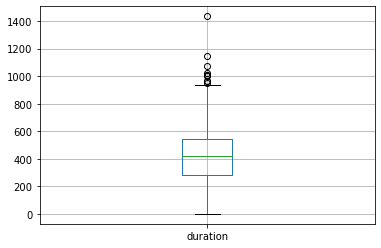

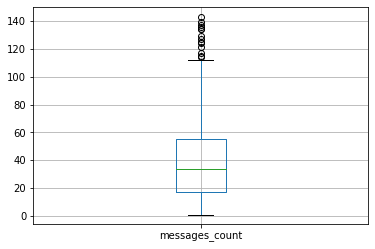

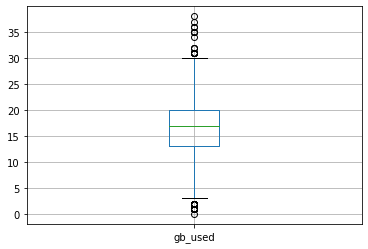

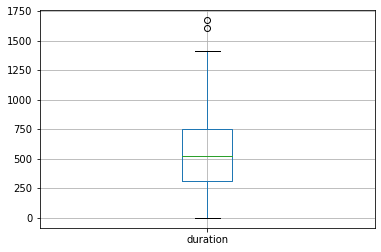

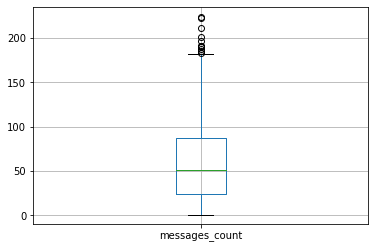

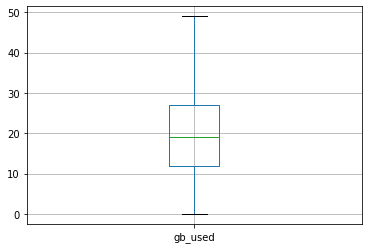

In [22]:
# Построение диаграмм ящиков с усами
df_smart.boxplot(column = 'duration')
plt.show()
df_smart.boxplot(column = 'messages_count')
plt.show()
df_smart.boxplot(column = 'gb_used')
plt.show()

df_ultra.boxplot(column = 'duration')
plt.show()
df_ultra.boxplot(column = 'messages_count')
plt.show()
df_ultra.boxplot(column = 'gb_used')
plt.show()

В данных есть редкие значения, например, очень большого количества минут. Такие данные являются исключениями и не вписываются в общую картину.

На основании боксплотов и предварительных диаграмм определил границы выбросов

Для тарифа SMART
- В столбце с продолжительностью звонков исключаю значения, превышающие 950 мин.
- В столбце с количеством сообщений исключаю значения, превышающие 115 сообщений.
- В столбце с интернет-трафиком оставляю интервал от 3 до 30 ГБ.

Для тарифа ULTRA
- В столбце с продолжительностью звонков исключаю значения, превышающие 1400 мин.
- В столбце с количеством сообщений исключаю значения, превышающие 180 сообщений.
- В столбце с интернет-трафиком оставляю все значения.

In [23]:
# Очищаю данные от выбросов
df_smart = df_smart.query('duration <= 950')
df_smart = df_smart.query('messages_count <= 115')
df_smart = df_smart.query('3 < gb_used <= 30')

df_ultra = df_ultra.query('duration <= 1400')
df_ultra = df_ultra.query('messages_count <= 180')

Данные готовы для нахождения параметров распределения и выбросы на них больше не влияют.

In [24]:
print('_________тариф SMART_________')

# Присваивание имён объектам Series
df_smart['duration'].name = 'Минуты'
df_smart['messages_count'].name = 'Сообщения'
df_smart['gb_used'].name = 'Интернет-трафик'

# Создание функции для расчёта и вывода на экран значений
q = [df_smart['duration'], df_smart['messages_count'], df_smart['gb_used']]
for w in q:
    print(w.name)
    print('Среднее количество в месяц -', round(w.mean()))
    print('Значение дисперсии -', round(np.var(w, ddof=1)))
    print('Значение стандартного отклонения -', round(np.std(w, ddof=1)))
    print()

print('_________тариф ULTRA_________')

# Присваивание имён объектам Series
df_ultra['duration'].name = 'Минуты'
df_ultra['messages_count'].name = 'Сообщения'
df_ultra['gb_used'].name = 'Интернет-трафик'

# Создание функции для расчёта и вывода на экран значений
e = [df_ultra['duration'], df_ultra['messages_count'], df_ultra['gb_used']]
for r in e:
    print(r.name)
    print('Среднее количество в месяц -', round(r.mean()))
    print('Значение дисперсии -', round(np.var(r, ddof=1)))
    print('Значение стандартного отклонения -', round(np.std(r, ddof=1)))
    print()

_________тариф SMART_________
Минуты
Среднее количество в месяц - 423
Значение дисперсии - 30867
Значение стандартного отклонения - 176

Сообщения
Среднее количество в месяц - 39
Значение дисперсии - 657
Значение стандартного отклонения - 26

Интернет-трафик
Среднее количество в месяц - 16
Значение дисперсии - 26
Значение стандартного отклонения - 5

_________тариф ULTRA_________
Минуты
Среднее количество в месяц - 547
Значение дисперсии - 92868
Значение стандартного отклонения - 305

Сообщения
Среднее количество в месяц - 60
Значение дисперсии - 1814
Значение стандартного отклонения - 43

Интернет-трафик
Среднее количество в месяц - 20
Значение дисперсии - 87
Значение стандартного отклонения - 9



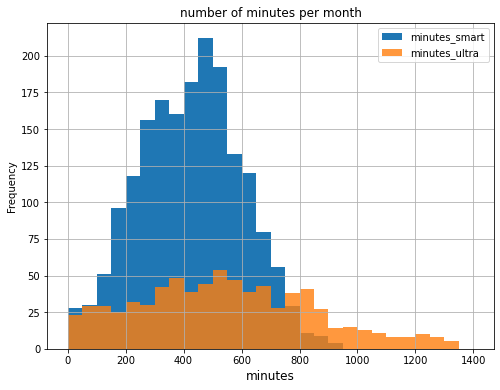

In [25]:
# Присваивание новых имён объектам Series
df_smart['duration'].name = 'minutes_smart'
df_smart['messages_count'].name = 'messages_smart'
df_smart['gb_used'].name = 'gb_smart'

df_ultra['duration'].name = 'minutes_ultra'
df_ultra['messages_count'].name = 'messages_ultra'
df_ultra['gb_used'].name = 'gb_ultra'

# Построение гистограмм
df_smart['duration'].plot(kind = 'hist',
                          range = (0, 950),
                          bins = 19,
                          figsize = (8, 6),
                          grid = True,
                          legend = True)
plt.title('number of minutes per month')
plt.xlabel('minutes', fontsize = 12, color = 'Black')

df_ultra['duration'].plot(kind = 'hist',
                          range = (0, 1400),
                          bins = 28,
                          figsize = (8, 6),
                          grid = True,
                          legend = True,
                          alpha = 0.8)
plt.show()

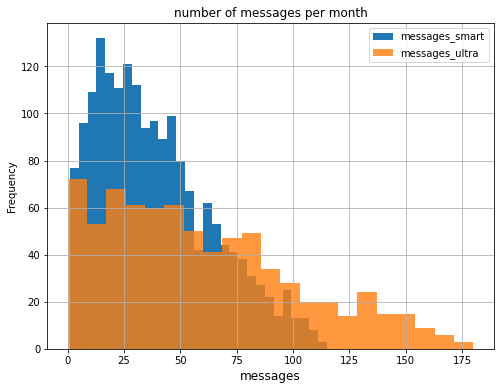

In [26]:
# Построение гистограмм
df_smart['messages_count'].plot(kind = 'hist',
                                bins = 29,
                                figsize = (8, 6),
                                grid = True,
                                legend = True)
plt.title('number of messages per month')
plt.xlabel('messages', fontsize = 12, color = 'Black')

df_ultra['messages_count'].plot(kind = 'hist',
                                range = (0, 180),
                                bins = 21,
                                figsize = (8, 6),
                                grid = True,
                                legend = True,
                                alpha = 0.8)
plt.show()

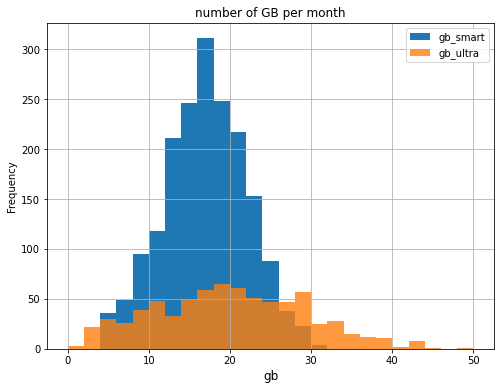

In [27]:
# Построение гистограмм
df_smart['gb_used'].plot(kind = 'hist',
                         range = (0, 40),
                         bins = 20,
                         figsize = (8, 6),
                         grid = True,
                         legend = True)
plt.title('number of GB per month')
plt.xlabel('gb', fontsize = 12, color = 'Black')

df_ultra['gb_used'].plot(kind = 'hist',
                         range = (0, 50),
                         bins = 25,
                         figsize = (8, 6),
                         grid = True,
                         legend = True,
                         alpha = 0.8)
plt.show()

### Выводы

**Минуты**

Гистограммы потраченных минут в месяц представлены нормальными распределениями. Для тарифа SMART среднее значение 423 минут, дисперсия 30867, стандартное отклонение 176, а для тарифа ULTRA среднее значение 547 минут, дисперсия 92868, стандартное отклонение 305.

**Сообщения**

Гистограммы количества отправленных сообщений в месяц представлены распределениями Пуассона. Для тарифа SMART среднее значение, дисперсия и стандартное отклонение равны 39, 657 и 26 соответственно; а для тарифа ULTRA 60, 1814 и 43 соответственно.

**Интернет-трафик**

Гистограммы интернет-трафика израсходованного за месяц представлены нормальными распределениями. Для тарифа SMART среднее значение, дисперсия и стандартное отклонение равны 16, 26 и 5 соответственно; а для тарифа ULTRA 20, 87 и 9 соответственно.

Если сравнивать средние значения пользователей тарифа ULTRA с SMART то первые используют:
- Минут на 124 больше: 547 - 423 = 124
- Сообщений на 21 больше: 60 - 39 = 21
- Интернет-трафика на 4 ГБ больше: 20 - 16 = 4

Для определения границы параметров, в которой находится больше всего значений, воспользуюсь правилом трёх сигм. Определю значение, находящееся на + сигма от среднего. Оно включает 84,1% всех значений по месяцам и этого достаточно, что бы тариф покрывал большую часть пользователей.

Тариф SMART
- Минуты: 599
- Сообщения: 65
- Интернет-трафик: 21

Тариф ULTRA
- Минуты: 852
- Сообщения: 103
- Интернет-трафик: 29

## Проверка гипотез

Подсчёт суммарной прибыли от тарифов

In [28]:
print('Прибыль с тарифа Smart: ', df_smart['monthly_revenue'].sum())

print('Прибыль с тарифа Ultra: ', df_ultra['monthly_revenue'].sum())

Прибыль с тарифа Smart:  2316245.0
Прибыль с тарифа Ultra:  1532850.0


### Сравнение тарифов «Ультра» и «Смарт»
Формулировка нулевой гипотезы
**Но: средние выручки пользователей тарифов «Ультра» и «Смарт» равны**.

Тогда, противоположная ей альтернативная гипотеза
**Н1: средние выручки пользователей тарифов «Ультра» и «Смарт» различаются**.

In [29]:
# Проверка гипотезы
alpha = 0.05

results = st.ttest_ind(df_smart['monthly_revenue'], df_ultra['monthly_revenue'], equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Среднее значение выручки пользователей тарифа Smart: ', round(df_smart['monthly_revenue'].mean()))
print('Среднее значение выручки пользователей тарифа Ultra: ', round(df_ultra['monthly_revenue'].mean()))

p-значение:  5.616697702156673e-150
Отвергаем нулевую гипотезу
Среднее значение выручки пользователей тарифа Smart:  1261
Среднее значение выручки пользователей тарифа Ultra:  2044


### Cравнение пользователей из Москвы и пользователей из других регионов

In [30]:
# Cоздание срезов с Москвой и без Москвы для тарифа Смарт
df_smart_moscow = df_smart.query('city == "москва"')
df_smart_other = df_smart.query('city != "москва"')

# Cоздание срезов с Москвой и без Москвы для тарифа Ультра
df_ultra_moscow = df_ultra.query('city == "москва"')
df_ultra_other = df_ultra.query('city != "москва"')

Формулировка нулевой гипотезы **Но: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов**.

Тогда, противоположная ей альтернативная гипотеза **Н1: средняя выручка пользователи из Москвы отличается от средней выручки пользователей из других регионов**.

In [31]:
# Проверка гипотезы для тарифа SMART
print('Проверка гипотезы для тарифа SMART')
alpha = 0.05

results = st.ttest_ind(df_smart_moscow['monthly_revenue'], df_smart_other['monthly_revenue'], equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Среднее значение выручки пользователей тарифа Smart в Москве: ', round(df_smart_moscow['monthly_revenue'].mean()))
print('Среднее значение выручки пользователей тарифа Smart в других: ', round(df_smart_other['monthly_revenue'].mean()))

Проверка гипотезы для тарифа SMART
p-значение:  0.05483172798585846
Не получилось отвергнуть нулевую гипотезу
Среднее значение выручки пользователей тарифа Smart в Москве:  1183
Среднее значение выручки пользователей тарифа Smart в других:  1275


In [32]:
# Проверка гипотезы для тарифа ULTRA
print('Проверка гипотезы для тарифа ULTRA')
alpha = 0.05

results = st.ttest_ind(df_ultra_moscow['monthly_revenue'], df_ultra_other['monthly_revenue'], equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Среднее значение выручки пользователей тарифа Ultra в Москве: ', round(df_ultra_moscow['monthly_revenue'].mean()))
print('Среднее значение выручки пользователей тарифа Ultra в других: ', round(df_ultra_other['monthly_revenue'].mean()))

Проверка гипотезы для тарифа ULTRA
p-значение:  0.05229317709194543
Не получилось отвергнуть нулевую гипотезу
Среднее значение выручки пользователей тарифа Ultra в Москве:  2082
Среднее значение выручки пользователей тарифа Ultra в других:  2030


### Выводы

**Cравнение тарифов «Ультра» и «Смарт»**

Гипотеза звучала так: средние выручки пользователей тарифов «Ультра» и «Смарт» равны. Результат проверки гипотезы показал, что нулевая гипотеза отвергается. Это говорит о том, что средние выручки тарифов различаются.
- Среднее значение выручки пользователей тарифа Smart:  1261.0
- Среднее значение выручки пользователей тарифа Ultra:  2044.0

**Cравнение пользователей из Москвы и пользователей из других регионов**

Гипотеза звучала так: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Результат проверки гипотезы и для тарифа Smart и для тарифа Ultra показал, что нулевую гипотезу отвергнуть не получилось. Это говорит о том, что средняя выручка пользователи из Москвы равна средней выручки пользователей из других регионов.

- Среднее значение выручки пользователей тарифа Smart в Москве:  1183.0
- Среднее значение выручки пользователей тарифа Smart в других:  1275.0

- Среднее значение выручки пользователей тарифа Ultra в Москве:  2082.0
- Среднее значение выручки пользователей тарифа Ultra в других:  2030.0

## Общий вывод

Вопрос, поставленный перед исследованием:

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше?

Средние значения потребления для тарифа SMART:
- 423 минуты
- 39 сообщений
- 16 ГБ интернет-трафика

Средние значения потребления для тарифа ULTRA:
- 547 минут
- 60 сообщений
- 20 ГБ Интернет-трафика

При этом 84% всех расходов за месяц равны:

Тариф SMART
- Минуты: 599
- Сообщения: 65
- Интернет-трафик: 21

Тариф ULTRA
- Минуты: 852
- Сообщения: 103
- Интернет-трафик: 29

Несмотря на разницу в стоимостях тарифов 550 рублей для Smart и 1950 рублей для Ultra в 1500 рублей, фактическая разница средних значений учитывающих переплаты равна 2044 (Ultra) - 1261 (Smart) = 783 рубля. Тариф Ultra приносит больше денег, чем тариф Smart. Но, более востребованным тарифом является Smart и с учётом всех пользователей доходы тарифов равны:
- Для Smart 2 316 245 рублей
- Для Ultra 1 532 850 рублей

Таким образом, не смотря на то, что тариф Ultra дороже, тариф Smart пользуется популярностью, и, таким образом, приносит больше денег. При этом разницы в доходах между Москвой и остальными городами для каждого тарифы не выявлено, т.е. разницы между городами нет.